In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

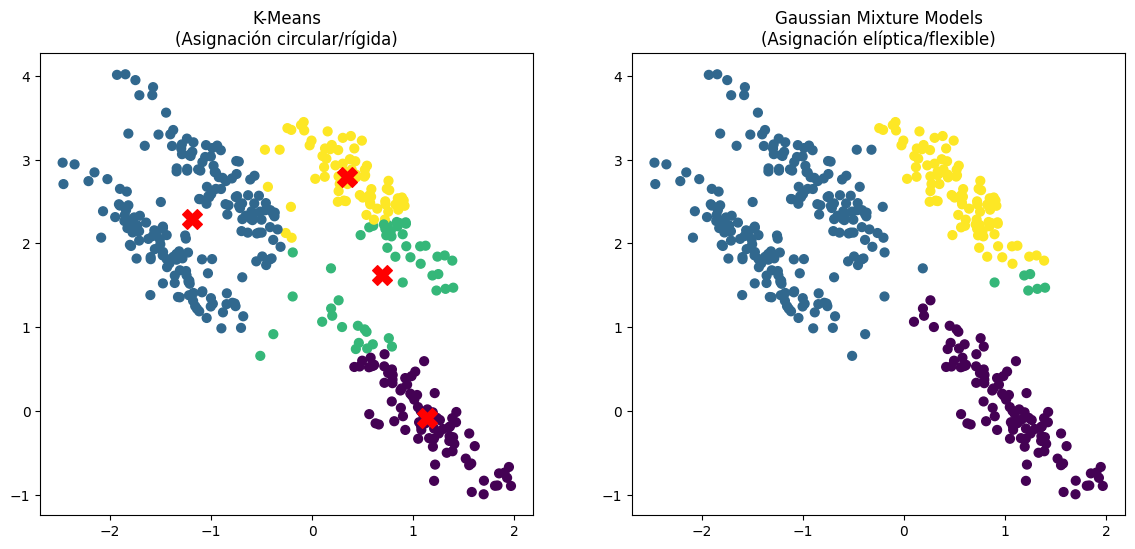

In [3]:
# Generar datos sintéticos elípticos (estirados)
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
transformation = rng.normal(size=(2, 2))
X_stretched = np.dot(X, transformation)

# 2. Configurar los modelos
# Queremos encontrar 4 clusters en ambos casos
n_clusters = 4

# K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
km_labels = kmeans.fit_predict(X_stretched)

# GMM (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_stretched)

# 3. Visualización
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot K-Means
ax[0].scatter(X_stretched[:, 0], X_stretched[:, 1], c=km_labels, s=40, cmap='viridis')
ax[0].set_title('K-Means\n(Asignación circular/rígida)')
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')

# Plot GMM
ax[1].scatter(X_stretched[:, 0], X_stretched[:, 1], c=gmm_labels, s=40, cmap='viridis')
ax[1].set_title('Gaussian Mixture Models\n(Asignación elíptica/flexible)')

plt.show()